# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
!curl -O https://raw.githubusercontent.com/udacity/workspaces-student-support/master/jupyter/workspace_utils.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1554  100  1554    0     0   8583      0 --:--:-- --:--:-- --:--:--  8931


In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [3]:
dog_files

array(['/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg',
       '/data/dog_images/train/103.Mastiff/Mastiff_06826.jpg',
       '/data/dog_images/train/103.Mastiff/Mastiff_06871.jpg', ...,
       '/data/dog_images/valid/100.Lowchen/Lowchen_06682.jpg',
       '/data/dog_images/valid/100.Lowchen/Lowchen_06708.jpg',
       '/data/dog_images/valid/100.Lowchen/Lowchen_06684.jpg'], 
      dtype='<U106')

In [4]:
human_files

array(['/data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg',
       '/data/lfw/Alex_Corretja/Alex_Corretja_0001.jpg',
       '/data/lfw/Daniele_Bergamin/Daniele_Bergamin_0001.jpg', ...,
       '/data/lfw/Ferenc_Madl/Ferenc_Madl_0002.jpg',
       '/data/lfw/Jim_Flaherty/Jim_Flaherty_0001.jpg',
       '/data/lfw/Stacey_Yamaguchi/Stacey_Yamaguchi_0001.jpg'], 
      dtype='<U90')

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


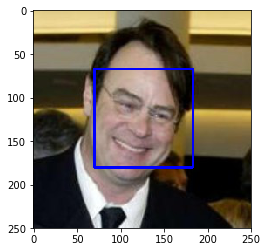

In [5]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [6]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

98% Humans classified correctly  
17% Dogs classified correctly

In [21]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_counter = []
dog_counter = []
for i in tqdm(range(100)):
    human_counter.append(face_detector(human_files_short[i]))
    dog_counter.append(face_detector(dog_files_short[i]))
    
print('{:.0f}% Humans classified correctly'.format(sum(human_counter)))
print('{:.0f}% Dogs classified incorrectly'.format(sum(dog_counter)))

100%|██████████| 100/100 [00:31<00:00,  3.17it/s]

98% Humans classified correctly
17% Dogs classified incorrectly


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [8]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [9]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:17<00:00, 31665953.15it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [10]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # open image
    img = Image.open(img_path)
    
    # define transform required for vgg16
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406),
                                                         (0.229, 0.224, 0.225))])
    # transform image
    img_t = transform(img)
    # add batch dimension
    batch_t = img_t.unsqueeze(0)
    if use_cuda:
        batch_t = batch_t.cuda()
    # set model to evaluation
    VGG16.eval()
    # run inference
    out = VGG16(batch_t)
    # get prediction through max value
    prediction = out.cpu().detach().numpy().argmax()
    
    return prediction # predicted class index

In [11]:
VGG16_predict(dog_files[156])

169

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    return (151 <= prediction <= 268)# true/false

In [13]:
dog_detector(human_files[199])

False

In [14]:
dog_detector(dog_files[199])

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__   
100% Dogs classified correctly  
100% Humans classified correctly

In [20]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
from tqdm import tqdm
dog_is_dog = []
human_is_dog = []
for i in tqdm(range(100)):
    dog_is_dog.append(dog_detector(dog_files_short[i]))
    human_is_dog.append(dog_detector(human_files_short[i]))

print('{:.0f}% Dogs classified correctly'.format(sum(dog_is_dog)))
print('{:.0f}% Humans classified incorrectly'.format(sum(human_is_dog)))


100%|██████████| 100/100 [00:07<00:00, 14.79it/s]

100% Dogs classified correctly
0% Humans classified incorrectly


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [16]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [22]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20


# define a transormation with data augmentation
transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.RandomRotation(10),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406),
                                                         (0.229, 0.224, 0.225))])
transform_v_t = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))
])

# '/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg'
# load data
train_data = datasets.ImageFolder('/data/dog_images/train', transform=transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid', transform=transform_v_t)
test_data = datasets.ImageFolder('/data/dog_images/test', transform=transform_v_t)

# prepare dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)


### Visualize a training batch

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# helper function to unormalize an image and display it
def imshow(img):
    
    # define inverse normalization
    inv_normalize = transforms.Normalize(
                            mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                            std=[1/0.229, 1/0.224, 1/0.225])
    # apply inverse normalization
    img = inv_normalize(img)
    # convert to numpy array for display
    img = img.numpy()
    # convert from Tensor image and show
    plt.imshow(np.transpose(img, (1,2,0)))
    

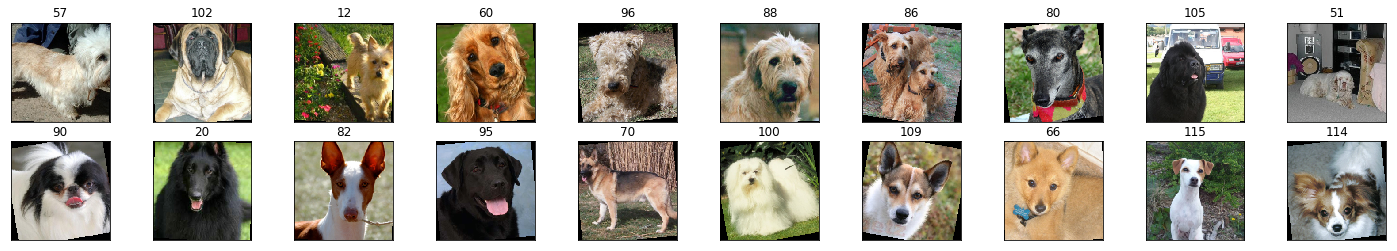

In [27]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25,4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(labels[idx].item())

In [25]:
labels

tensor([  63,   51,   25,   15,   41,   36,   17,   45,    9,   91,
         124,   61,   98,   65,  115,   48,  129,  114,   89,  115])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- I resize it and then crop it.  Resize bring the image size closer to the minimum accepted by vgg which is 225, and we want a small size to speed up training.  Resize comes first as we want to keep the aspect ratio intact when we reduce the image size, so we set it at 256 to give us enough padding for non-squared images ahead of the crop.  Then we crop it at 225 and get a squared image of the minimum accepted size by vgg.
- I augmented the dataset following what we learned in lesson 1. I kept it simple by just adding flips and rotations.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [28]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # conv layer sees 224x224x3 image tensor
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        # conv layer sees 112x112x32 image tensor
        self.conv2 = nn.Conv2d(32, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        # conv layer sees 56x56x128 image tensor
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        # conv layer sees 28x28x256 image tensor
        self.conv4 = nn.Conv2d(256, 740, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(740)
        # conv layer sees 28x28x740 image tensor
        # max pooling layer
        self.pool = nn.MaxPool2d(2,2)
        # linear layer sees 14x14x740 -> 1000
        self.fc1 = nn.Linear(14*14*740, 1000)
        # linear layer (1000 -> 500)
        self.fc2 = nn.Linear(1000, 500)
        # linear layer (500 -> 133) output dog classes
        self.fc3 = nn.Linear(500, 133)
        # droput layer p=0.25
        self.drop = nn.Dropout(0.45)
        
    
    def forward(self, x):
        ## Define forward behavior
        # sequence of convolutional and pooling layers
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        #x = F.relu(self.conv5(x))
        # flatten image input
        x = x.view(-1, 14*14*740)
        # add dropout layer
        x = self.drop(x)
        # add first hidden layer, with relu activation layer
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.drop(x)
        # add second hidden layer, with relu activation layer
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.drop(x)
        # add final hidden layer with output classes
        x = self.fc3(x)

        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [29]:
print(model_scratch)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 740, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(740, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=145040, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=133, bias=True)
  (drop): Dropout(p=0.45)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I followed a similar structure to what we learned in the cifar10 lesson, but extended the convolutional layers to follow the depth used by vgg16.  I kept it smaller than vgg16 to speed up training.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [30]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters())

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [31]:
# got an error after training: OSError: image file is truncated (150 bytes not processed)
# online solution said to paste the code below
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [32]:
# define loaders dictionary storing the dataloaders
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

In [33]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # set grads to zero
            optimizer.zero_grad()
            # forward computation
            out = model(data)
            # calculate loss
            loss = criterion(out, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            # forward pass: compute predicted outputs by passing inputs to the model
            out = model(data)
            # calculate the batch loss
            loss = criterion(out, target)
            ## update the average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} -> {:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
            # save model
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# then wrap long-running work in below function
from workspace_utils import active_session
# this is to keep the workspace active
with active_session():
    # train the model
    model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


Epoch: 1 	Training Loss: 5.369614 	Validation Loss: 4.886033
Validation loss decreased (inf -> 4.886033). Saving model...
Epoch: 2 	Training Loss: 4.867423 	Validation Loss: 4.803200
Validation loss decreased (4.886033 -> 4.803200). Saving model...
Epoch: 3 	Training Loss: 4.803328 	Validation Loss: 4.729646
Validation loss decreased (4.803200 -> 4.729646). Saving model...
Epoch: 4 	Training Loss: 4.760665 	Validation Loss: 4.695060
Validation loss decreased (4.729646 -> 4.695060). Saving model...
Epoch: 5 	Training Loss: 4.745352 	Validation Loss: 4.713899
Epoch: 6 	Training Loss: 4.729297 	Validation Loss: 4.688776
Validation loss decreased (4.695060 -> 4.688776). Saving model...
Epoch: 7 	Training Loss: 4.699762 	Validation Loss: 4.649764
Validation loss decreased (4.688776 -> 4.649764). Saving model...
Epoch: 8 	Training Loss: 4.675629 	Validation Loss: 4.642673
Validation loss decreased (4.649764 -> 4.642673). Saving model...
Epoch: 9 	Training Loss: 4.671996 	Validation Loss: 4.6

KeyboardInterrupt: 

In [34]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [ ]:
# load model and optimizer states to resume training

# Additional information
EPOCH = 29
PATH = "model_scratch.pt"
TLOSS = 3.734124
VLOSS = 3.752248

torch.save({
            'epoch': EPOCH,
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            't_loss': TLOSS,
            'v_loss': VLOSS,
            }, PATH)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [35]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function 
# the active_session is to keep udacitys workspace active and not shut down during long term calculations
with active_session():
    test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.792615


Test Accuracy: 11% (93/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [36]:
## TODO: Specify data loaders
import os
from torchvision import datasets
from PIL import Image
import torchvision.transforms as transforms
import torch

batch_size = 20

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

transform_v_t = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))
])

# import data
train_data = datasets.ImageFolder('/data/dog_images/train', transform=transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid', transform=transform_v_t)
test_data = datasets.ImageFolder('/data/dog_images/test', transform=transform_v_t)

# prepare dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

#### steps taken from flower lecture
---
## Define the Model

To define a model for training we'll follow these steps:
1. Load in a pre-trained VGG16 model
2. "Freeze" all the parameters, so the net acts as a fixed feature extractor 
3. Remove the last layer
4. Replace the last layer with a linear classifier of our own

**Freezing simply means that the parameters in the pre-trained model will *not* change during training.**

In [37]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# load the pretrained model
model_transfer = models.vgg16(pretrained=True)

# freeze training for all 'features' layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

In [38]:
# check the number of parameters in the last layer
print(model_transfer.classifier[6].in_features)
print(model_transfer.classifier[6].out_features)

4096
1000


In [39]:
# replace the last fully connected layer to match the number of outputs for this problem 
model_transfer.classifier[6] = nn.Linear(in_features=4096, out_features=133, bias=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# if cuda available, move the model to gpu
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__   

1) Load a pretrained model  
2) Freeze training parameters on features layers  
3) Replace the last fully connected layer to represent the number of classes in our application (133)  

I think this architecture is suitable for this project as is similar to the lesson we had on transfer learning for flower types.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [40]:
import torch.optim as optim

# categorical cross entropy
criterion_transfer = nn.CrossEntropyLoss()
# optimization (stochastic gradient descent)
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters())

### (IMPLEMENTATION) Train and Validate the Model


Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [41]:
# data dictionary
data_transfer = {'train': train_data, 'valid': valid_data, 'test': test_data}
# loader dictionary
loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

In [42]:
# got an error after training: OSError: image file is truncated (150 bytes not processed)
# online solution said to paste the code below
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [43]:
# training routine
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    # set validation loss to max
    valid_loss_min = np.Inf
    
    for epoch in range(n_epochs):
        train_loss = 0.0
        valid_loss = 0.0
        
        ##################
        # Train the model
        #################
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move tensors to gpu if cuda available
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # reset gradients
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # calculate loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # optimization step
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        
        ####################
        # Validate the model
        ####################
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move tensors to gpu if cuda available
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # compute forward pass
            output = model(data)
            # compute loss
            loss = criterion(output, target)
            # record the average valid loss
            valid_loss = valid_loss + ((1/(batch_idx + 1)) * (loss.data - valid_loss))
            
        ##############################
        # Save model if loss is lowest
        ##############################    
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} -> {:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
            # save model
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss    
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
    return model

In [50]:
# train the model
# the active_session is to keep udacitys workspace active and not shut down during long term calculations
with active_session():
    model_transfer = train(40, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')



Validation loss decreased (inf -> 1.153165). Saving model...
Epoch: 0 	Training Loss: 0.878358 	Validation Loss: 1.153165


KeyboardInterrupt: 

In [48]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [49]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.304987


Test Accuracy: 63% (534/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [51]:
# extracting class names from data vars
data_transfer['train'].classes[1][4:].replace("_", " ")

'Afghan hound'

In [52]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    # load image
    img = Image.open(img_path)
    # define transform
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406),
                             (0.229, 0.224, 0.225))
    ])
    # transform image
    img = transform(img)
    # add batch dimension
    img = img.unsqueeze(0)
    # move to gpu if cuda available
    if use_cuda:
        img = img.cuda()
    # run inference
    output = model_transfer(img)
    # get prediction through max value
    prediction = output.cpu().detach().numpy().argmax()
    return class_names[prediction]

In [53]:
predict_breed_transfer(dog_files[-1])

'Havanese'

In [54]:
class_names

['Affenpinscher',
 'Afghan hound',
 'Airedale terrier',
 'Akita',
 'Alaskan malamute',
 'American eskimo dog',
 'American foxhound',
 'American staffordshire terrier',
 'American water spaniel',
 'Anatolian shepherd dog',
 'Australian cattle dog',
 'Australian shepherd',
 'Australian terrier',
 'Basenji',
 'Basset hound',
 'Beagle',
 'Bearded collie',
 'Beauceron',
 'Bedlington terrier',
 'Belgian malinois',
 'Belgian sheepdog',
 'Belgian tervuren',
 'Bernese mountain dog',
 'Bichon frise',
 'Black and tan coonhound',
 'Black russian terrier',
 'Bloodhound',
 'Bluetick coonhound',
 'Border collie',
 'Border terrier',
 'Borzoi',
 'Boston terrier',
 'Bouvier des flandres',
 'Boxer',
 'Boykin spaniel',
 'Briard',
 'Brittany',
 'Brussels griffon',
 'Bull terrier',
 'Bulldog',
 'Bullmastiff',
 'Cairn terrier',
 'Canaan dog',
 'Cane corso',
 'Cardigan welsh corgi',
 'Cavalier king charles spaniel',
 'Chesapeake bay retriever',
 'Chihuahua',
 'Chinese crested',
 'Chinese shar-pei',
 'Chow cho

### Visualize Sample Test Results

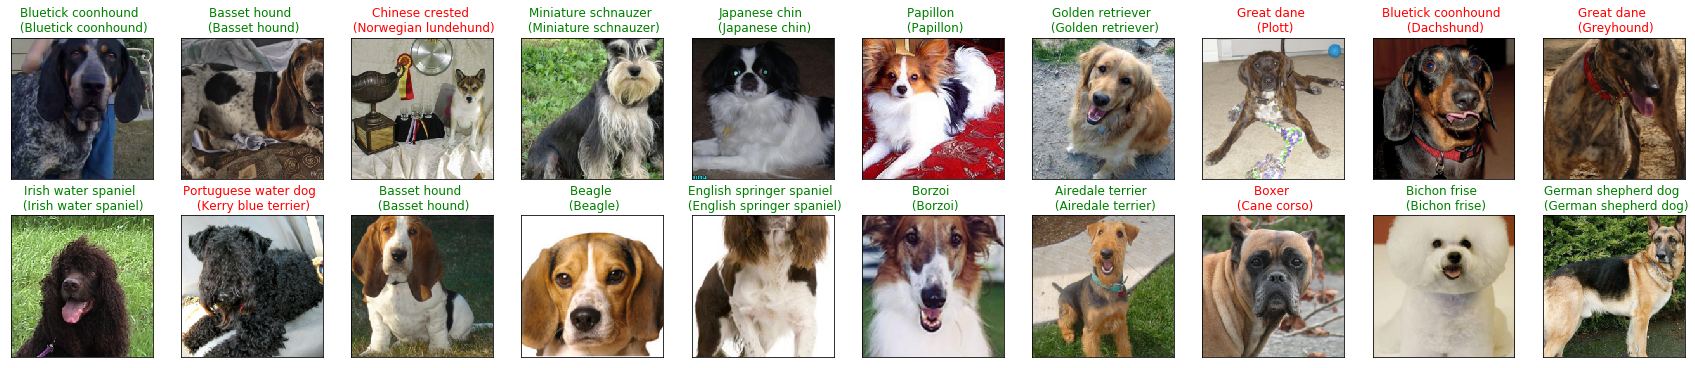

In [55]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# helper function to unormalize an image and display it
def imshow(img):
    
    # define inverse normalization
    inv_normalize = transforms.Normalize(
                            mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                            std=[1/0.229, 1/0.224, 1/0.225])
    # apply inverse normalization
    img = inv_normalize(img)
    # convert to numpy array for display
    img = img.numpy()
    # convert from Tensor image and show
    plt.imshow(np.transpose(img, (1,2,0)))
    

# obtain one batch of test images
dataiter = iter(loaders_transfer['test'])
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if use_cuda:
    images = images.cuda()

# get sample outputs
output = model_transfer(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())

# move model inputs back to cpu for display, if GPU available
if use_cuda:
    images = images.cpu()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(30, 6))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} \n ({})".format(class_names[preds[idx]], class_names[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [56]:
# download class names for pretrained VGG16
import urllib, json

url = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

response = urllib.request.urlopen(url)
# dictionary with class id, code and name
class_idx = json.loads(response.read())
# create list with class names indexed by number
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

In [57]:
# function to show image with breed
def show_result(img_path, salutation, breed):
    # open image and show it
    img = Image.open(img_path)
    print(f'hello, {salutation}!')
    plt.imshow(img)
    plt.show()
    print(f'You look like a {breed}...')

In [58]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    # boolean: dog detector
    is_dog = dog_detector(img_path)
    # boolean: human detector
    is_human = face_detector(img_path)
    # evaluated XOR lambda: if both are True or False then is_neither is True, else False 
    is_neither = (lambda x, y: True if (x + y) % 2 == 0 else False)(is_dog, is_human)
    
    if is_neither:
        show_result(img_path, 'alien', 'thing from another world')
    else:
        # run inference to predict breed using model trained with transfer learning
        breed = predict_breed_transfer(img_path)
        # run indference with pretrained vgg16 and return class name
        #breed = idx2label[VGG16_predict(img_path)]
        # returns the salutation, either dog or human
        salutation = (lambda x: 'human' if x else 'dog')(is_human)
        show_result(img_path, salutation, breed)
    
    # debug
    '''
    print('Dog detected: ', is_dog)
    print('Human detected: ', is_human)
    print('Is neither ', is_neither)
    '''
        
        


hello, human!


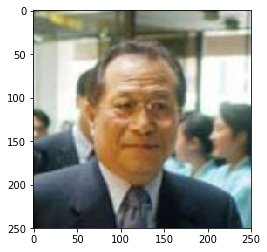

You look like a Chinese crested...


In [59]:
run_app(human_files[11])

hello, dog!


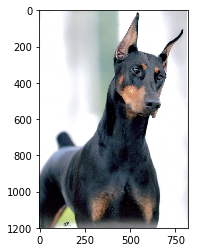

You look like a Doberman pinscher...


In [60]:
run_app(dog_files[100])

In [63]:
print('hello, ', 'human', '!')

hello,  human !


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__   

I am actually happy with the implementation and the output.. it feels efficient and correct.

One thing that could always be improved is the underlying detection algorithms, but that requires more training and loads of time.

From the results I can also see that the face detector is not very accurate as the golden retriever was cataloged as a human, however, the dog classifier did spot it correctly.

Another improvement to the algorithm could be to use the full vgg16 to classify those photos which are neither human nor of a dog.

I could also improve the way results are displayed to make it more user friendly.

hello, human!


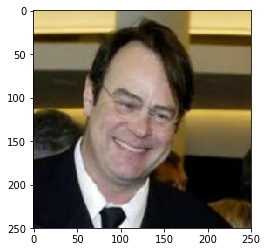

You look like a Airedale terrier...
hello, human!


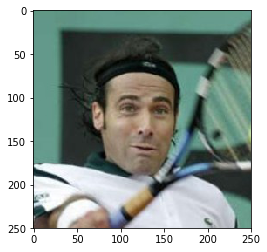

You look like a Chinese crested...
hello, human!


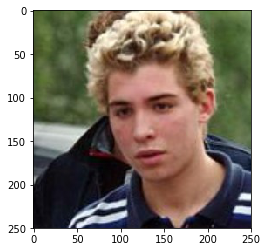

You look like a Airedale terrier...
hello, dog!


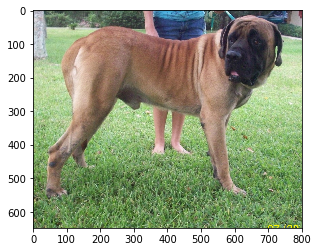

You look like a Bullmastiff...
hello, dog!


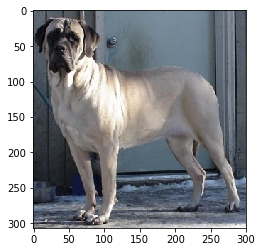

You look like a Mastiff...
hello, dog!


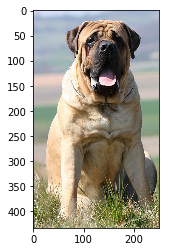

You look like a Bloodhound...


In [61]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

### Test on new images

In [66]:
# load filenames for human and dog images
new_images = np.array(glob("/home/workspace/dog_project/test_images/*"))

# print number of images in each dataset
print('There are %d total new images.' % len(new_images))


There are 6 total new images.


In [67]:
new_images

array(['/home/workspace/dog_project/test_images/cat.jpeg',
       '/home/workspace/dog_project/test_images/julia.jpeg',
       '/home/workspace/dog_project/test_images/golden_retriever.jpeg',
       '/home/workspace/dog_project/test_images/alessandra-ambrosio.jpeg',
       '/home/workspace/dog_project/test_images/husky.jpeg',
       '/home/workspace/dog_project/test_images/eiffel.jpeg'], 
      dtype='<U64')

hello, alien!


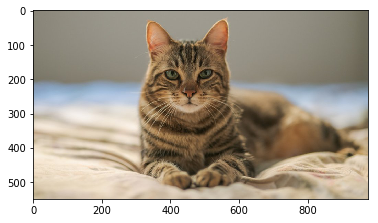

You look like a thing from another world...
hello, alien!


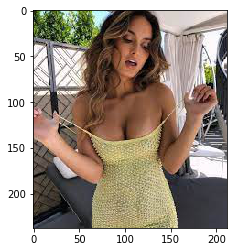

You look like a thing from another world...
hello, human!


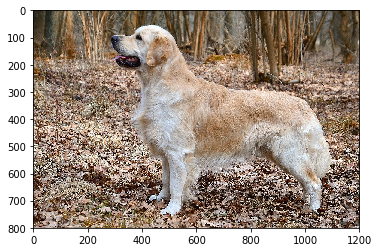

You look like a Golden retriever...
hello, human!


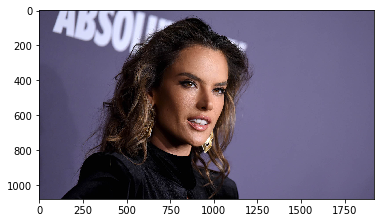

You look like a Chinese crested...
hello, dog!


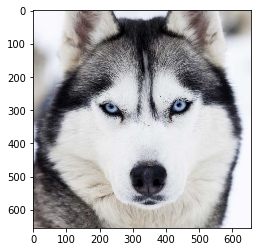

You look like a Alaskan malamute...
hello, alien!


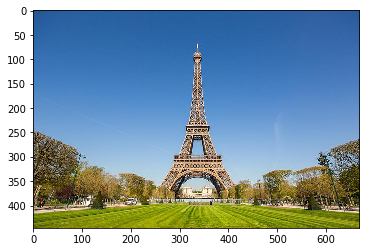

You look like a thing from another world...


In [68]:
for file in new_images:
    run_app(file)